# <font color='Blue'>TF - IDF </font>

- **T**ime **F**requency - **I**nverse **D**ocument **F**requency

- TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used to evaluate the importance of a word (or term) within a document in a collection of documents.

- It is commonly used in information retrieval, search engines, and text mining to identify key words or phrases within documents and rank their relevance.

##### <font color='magenta'> </font>

##### <font color='magenta'>How TF-IDF Works (Backend Process): </font>

- **Term Frequency (TF)**:
This measures how frequently a word appears in a document relative to the total number of words in the document. The idea is that if a word appears more times in a document, it is more important in that document.

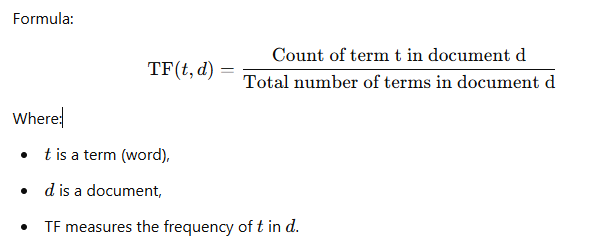

# <font color='red'> </font>

**Inverse Document Frequency (IDF)**:
This measures how important a word is across the entire corpus of documents. Words that appear in many documents are less important, as they don’t help in distinguishing between documents. IDF gives higher weight to terms that appear less frequently across documents.

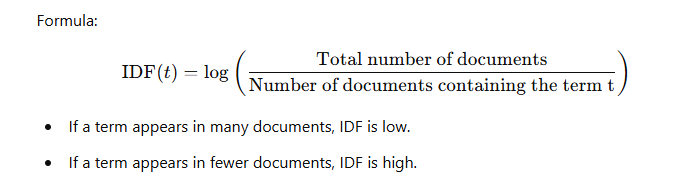

# <font color='red'> </font>

**TF-IDF Calculation**:
The final TF-IDF score for a term in a document is the product of its TF and IDF scores.

##### <font color='magenta'> Example</font>

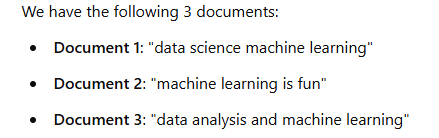

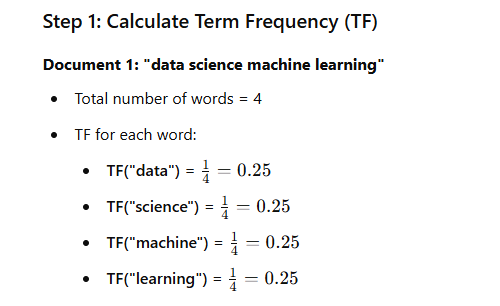

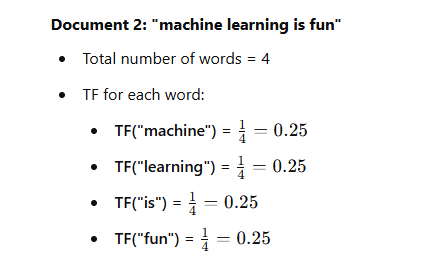

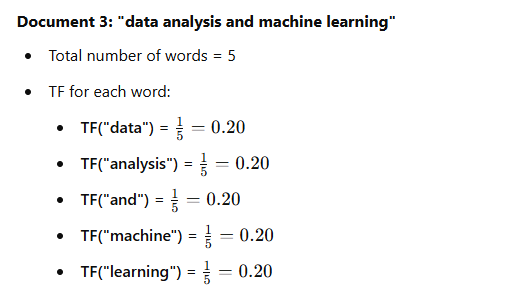

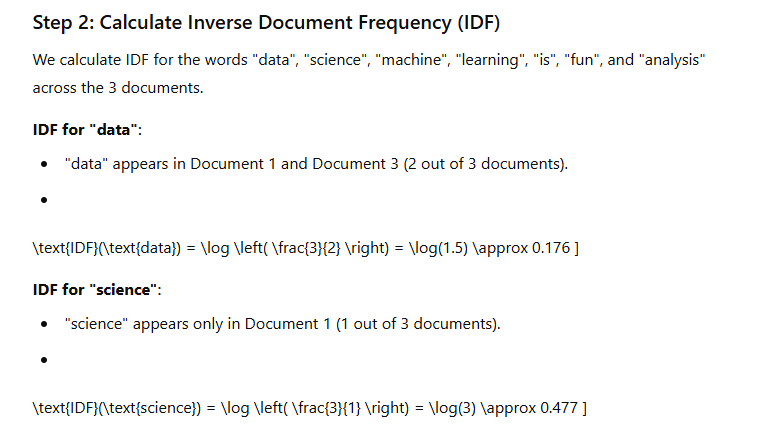

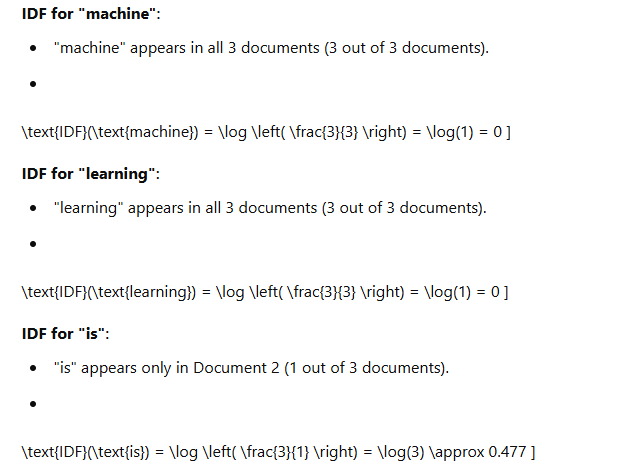

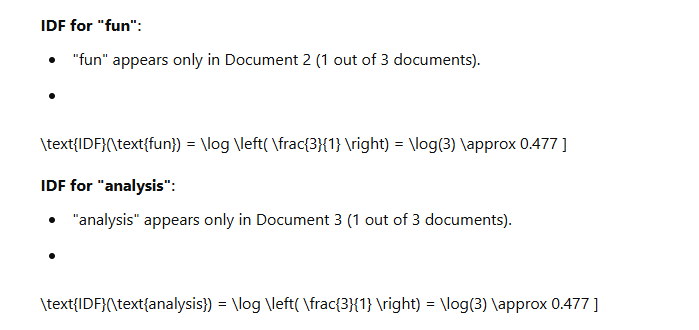

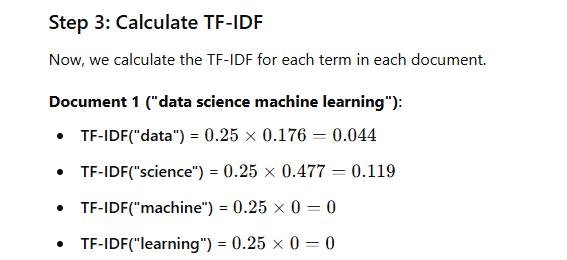

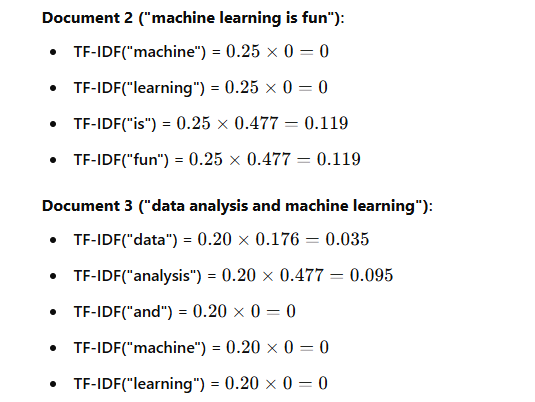

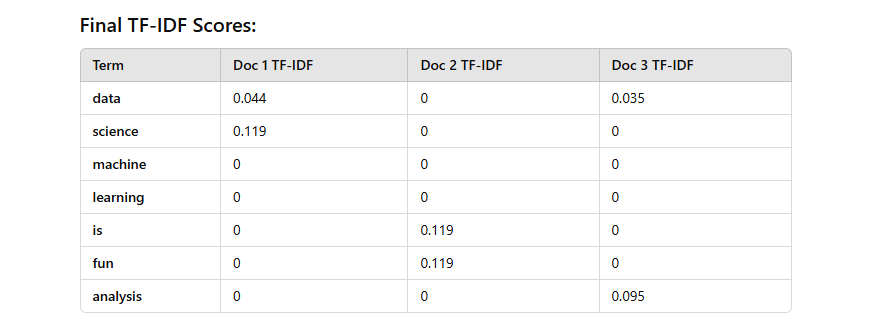

**Insights**:
- "machine" and "learning" are common terms, so their TF-IDF scores are 0 across all documents, indicating that they do not help in distinguishing between documents.
 
- "science" has a high TF-IDF score in Document 1 because it is rare in the corpus.

- "is", "fun", "analysis" have higher TF-IDF values in their respective documents because they are rarer and appear in fewer documents.

# <font color='red'> </font>

**Uses of TF-IDF**:

- **Search Engines**: Helps rank documents based on relevance to a search query. Keywords with higher TF-IDF scores are considered more relevant.

- **Text Classification**: Used in text mining for categorizing text based on its content.

- **Information Retrieval**: Helps in retrieving documents based on the importance of terms (keywords).

- **Recommender Systems**: Identifying key terms to make content-based recommendations.

# <font color='red'> </font>

# <font color='red'> </font>

# <font color='red'>Model Building </font>

- Information Retrieval System using TF-IDF

# <font color='red'> </font>

##### <font color='magenta'>Import Libraries </font>

In [4]:
import pandas as pd
import numpy as np
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

 ##### <font color='magenta'>Load Dataset </font>

In [7]:
# Sample document corpus (could be any set of documents like news articles, research papers, etc.)
documents = [
    "Information retrieval is the process of obtaining information from a large repository.",
    "Text mining involves the use of statistical methods to analyze and extract information from text.",
    "Search engines use information retrieval techniques to index and rank web pages.",
    "Machine learning is a subset of artificial intelligence that focuses on building models from data.",
    "Natural Language Processing (NLP) deals with the interaction between computers and human languages."
]

# Creating a DataFrame
df = pd.DataFrame({'document': documents})

 ##### <font color='magenta'>Text Preprocessing </font>

- We preprocess the text data by removing stopwords, punctuation, and converting the text to lowercase.

In [8]:
# Preprocessing function to clean the documents
def preprocess_text(text):
    # Tokenize and convert to lowercase
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    
    # Remove stopwords and punctuation
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    
    return ' '.join(tokens)

# Apply preprocessing to each document
df['processed_document'] = df['document'].apply(preprocess_text)

# Display cleaned text
print(df[['document', 'processed_document']].head())


                                            document  \
0  Information retrieval is the process of obtain...   
1  Text mining involves the use of statistical me...   
2  Search engines use information retrieval techn...   
3  Machine learning is a subset of artificial int...   
4  Natural Language Processing (NLP) deals with t...   

                                  processed_document  
0  information retrieval process obtaining inform...  
1  text mining involves use statistical methods a...  
2  search engines use information retrieval techn...  
3  machine learning subset artificial intelligenc...  
4  natural language processing nlp deals interact...  


 ##### <font color='magenta'>TF-IDF Feature Extraction </font>

- Next, we extract features from the preprocessed documents using the TF-IDF vectorizer. The TF-IDF vectorizer helps to capture the importance of words in the context of the entire collection.

In [11]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_document'])

# Show the shape of the TF-IDF matrix
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")


TF-IDF Matrix Shape: (5, 39)


 ##### <font color='magenta'> Query Processing </font>

- Now, we will allow the user to input a query, preprocess it the same way we did with the documents, and then use TF-IDF to find the most relevant documents.

In [13]:
# Function to preprocess the query
def preprocess_query(query):
    query_tokens = word_tokenize(query.lower())
    stop_words = set(stopwords.words('english'))
    query_tokens = [word for word in query_tokens if word not in stop_words and word not in string.punctuation]
    return ' '.join(query_tokens)

# Sample query
query = "What is machine learning?"

# Preprocess the query
processed_query = preprocess_query(query)

# Transform the query using the same TF-IDF vectorizer
query_tfidf = tfidf_vectorizer.transform([processed_query])

  ##### <font color='magenta'>Document Ranking Based on Query </font>

- We will compute the cosine similarity between the processed query vector and the document vectors to rank the documents based on their relevance to the query.

In [14]:
# Calculate cosine similarity between the query and all documents
cosine_similarities = cosine_similarity(query_tfidf, tfidf_matrix)

# Rank the documents based on similarity scores
similarity_scores = cosine_similarities.flatten()

# Sort documents by their similarity scores (descending order)
sorted_doc_indices = similarity_scores.argsort()[::-1]

# Display the sorted documents with their scores
print("\nDocuments ranked by relevance to the query:")
for index in sorted_doc_indices:
    print(f"Document: {df['document'][index]} | Similarity Score: {similarity_scores[index]:.4f}")


Documents ranked by relevance to the query:
Document: Machine learning is a subset of artificial intelligence that focuses on building models from data. | Similarity Score: 0.4714
Document: Natural Language Processing (NLP) deals with the interaction between computers and human languages. | Similarity Score: 0.0000
Document: Search engines use information retrieval techniques to index and rank web pages. | Similarity Score: 0.0000
Document: Text mining involves the use of statistical methods to analyze and extract information from text. | Similarity Score: 0.0000
Document: Information retrieval is the process of obtaining information from a large repository. | Similarity Score: 0.0000


##### <font color='magenta'> </font>

##### <font color='magenta'> </font>

# <font color='red'>END. </font>